In [ ]:
# !pip install yfinance --upgrade --no-cache-dir

In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import datetime as dt
from pandas_datareader import data as pdr
import yfinance as yf
import numpy as np

yf.pdr_override()

C:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
# Create our portfolio of equities
tickers = ['AAPL', 'BAC', 'MSFT', 'CVX', 'UPS', 'AXP', 'TSLA', 'KO', 'MCO', 'DVA']
 
# Download closing prices
df = pdr.get_data_yahoo(tickers, start="2021-01-01", end=dt.date.today())['Close']
 
# From the closing prices, calculate periodic returns
returns = df.pct_change()

# Preview the data
df.tail()

[*********************100%***********************]  10 of 10 completed


,AAPL,AXP,BAC,CVX,DVA,KO,MCO,MSFT,TSLA,UPS
Date,,,,,,,,,,
2022-04-18,165.070007,184.479996,38.849998,173.889999,119.519997,64.440002,328.230011,280.519989,1004.289978,187.160004
2022-04-19,167.399994,187.169998,39.570000,171.830002,120.760002,65.070000,333.540009,285.299988,1028.150024,190.690002
2022-04-20,167.229996,188.460007,39.660000,172.529999,123.379997,65.959999,335.040009,286.359985,977.200012,190.429993
2022-04-21,166.419998,185.740005,38.910000,164.580002,122.660004,66.209999,329.920013,280.809998,1008.780029,188.800003
2022-04-22,161.789993,180.539993,37.560001,160.949997,111.410004,65.250000,322.420013,274.029999,1005.049988,187.149994


Text(0, 0.5, 'price ($)')

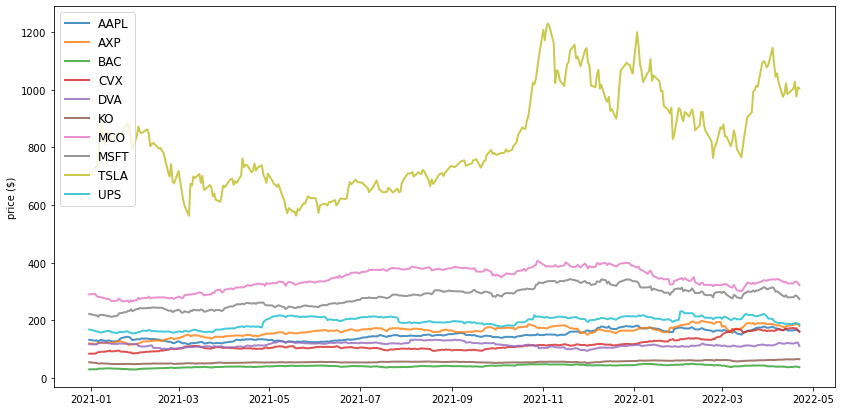

In [3]:
# Setting size of graph
plt.figure(figsize=(14, 7))

# plotting the graph
for i in df.columns.values:
    plt.plot(df.index, df[i], lw=2, alpha=0.8,label=i)

# setting legend and axis
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price ($)')

Text(0, 0.5, 'daily returns')

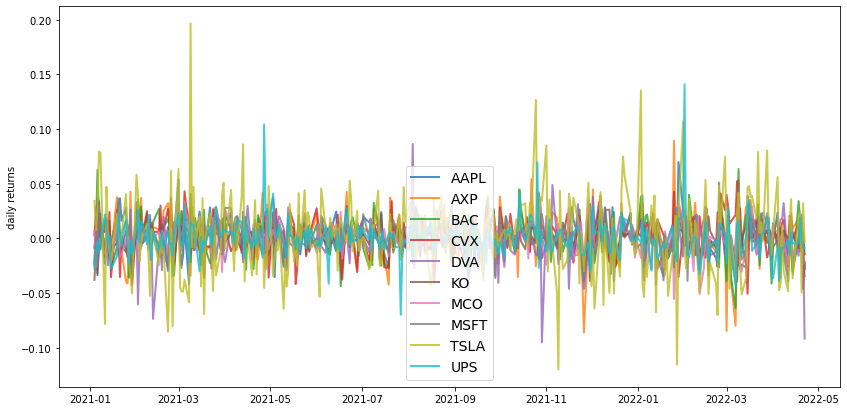

In [4]:
# Gives you the daily returns
returns = df.pct_change()

plt.figure(figsize=(14, 7))
for i in returns.columns.values:
    plt.plot(returns.index, returns[i], lw=2, alpha=0.8,label=i)
    
plt.legend(loc='lower center', fontsize=14)
plt.ylabel('daily returns')

In [13]:
mean_returns = returns.mean()

cov_matrix = returns.cov()
# Number of portfolios to simulate
num_portfolios = 50000
# Risk free rate (used for Sharpe ratio below)
# anchored on treasury bond rates
risk_free_rate = 0.0


In [14]:
# Define function to calculate returns, volatility
def portfolio_annualized_performance(weights, mean_returns, cov_matrix):
    # Given the avg returns, weights of equities calc. the portfolio return
    returns = np.sum(mean_returns*weights ) *252
    # Standard deviation of portfolio (using dot product against covariance, weights)
    # 252 trading days
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns


def generate_random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    # Initialize array of shape 3 x N to store our results, 
    # where N is the number of portfolios we're going to simulate
    results = np.zeros((3,num_portfolios))
    # Array to store the weights of each equity
    weight_array = []
    for i in range(num_portfolios):
        # Randomly assign floats to our N equities
        weights = np.random.random(10)
        # Convert the randomized floats to percentages (summing to 100)
        weights /= np.sum(weights)
        # Add to our portfolio weight array
        weight_array.append(weights)
        # Pull the standard deviation, returns from our function above using 
        # the weights, mean returns generated in this function
        portfolio_std_dev, portfolio_return = portfolio_annualized_performance(weights, mean_returns, cov_matrix)
        # Store output
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        # Sharpe ratio
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weight_array

In [31]:
# pull results, weights from random portfolios
results, weights = generate_random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)

In [32]:
results

array([[0.19153546, 0.18023511, 0.15876866, ..., 0.19009246, 0.16686542,
        0.16542591],
       [0.23776131, 0.25392484, 0.18497858, ..., 0.22461101, 0.19015629,
        0.21687622],
       [1.24134357, 1.40885337, 1.16508244, ..., 1.18158822, 1.1395788 ,
        1.31101721]])

In [33]:
weights

[array([0.23205552, 0.09141325, 0.22677822, 0.05946841, 0.07042497,
        0.03563855, 0.041306  , 0.05465958, 0.13358041, 0.05467509]),
 array([0.09105155, 0.06622173, 0.15076048, 0.13820655, 0.02092415,
        0.00330233, 0.12621528, 0.14354433, 0.11950064, 0.14027296]),
 array([0.21571572, 0.09891874, 0.07515594, 0.07377062, 0.18915196,
        0.09222446, 0.09119087, 0.11492881, 0.01564905, 0.03329382]),
 array([0.0507172 , 0.07755399, 0.11636274, 0.10291303, 0.15831191,
        0.17735327, 0.12602342, 0.08537591, 0.05486708, 0.05052147]),
 array([0.14561214, 0.07691489, 0.13694074, 0.01024058, 0.13045715,
        0.08712923, 0.14297012, 0.08001381, 0.08751373, 0.10220761]),
 array([0.01279983, 0.16529155, 0.16214931, 0.02904712, 0.10618801,
        0.13011067, 0.01695731, 0.14807264, 0.17642545, 0.05295812]),
 array([0.16120157, 0.0230556 , 0.01558295, 0.13437874, 0.08272203,
        0.0255589 , 0.16779505, 0.16920148, 0.13152881, 0.08897486]),
 array([0.14551046, 0.02122171, 0.

In [34]:
def max_sharpe_portfolios():

    # pull the max portfolio Sharpe ratio (3rd element in results array from 
    # generate_random_portfolios function)
    max_sharpe_idx = np.argmax(results[2])

    # pull the associated standard deviation, annualized return w/ the max Sharpe ratio
    sharpe_stdev_portfolio, sharpe_returns_portfolio = results[0,max_sharpe_idx], results[1,max_sharpe_idx]

    # pull the allocation associated with max Sharpe ratio
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=df.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    print("-"*100)
    print("Portfolio at maximum Sharpe Ratio\n")
    print("--Returns, volatility--\n")
    print("Annualized Return:", round(sharpe_returns_portfolio,2))
    print("Annualized Volatility:", round(sharpe_stdev_portfolio,2))
    print("Sharpe Ratio:", round(max_sharpe_idx,2))
    
    print("\n")
    print("--Allocation at max Sharpe ratio--\n")
    print(max_sharpe_allocation)
    print("-"*100)

    return sharpe_returns_portfolio, sharpe_stdev_portfolio

sharpe_returns_portfolio, sharpe_stdev_portfolio = max_sharpe_portfolios()


----------------------------------------------------------------------------------------------------
Portfolio at maximum Sharpe Ratio

--Returns, volatility--

Annualized Return: 0.32
Annualized Volatility: 0.16
Sharpe Ratio: 3226


--Allocation at max Sharpe ratio--

            AAPL   AXP   BAC    CVX   DVA     KO   MCO   MSFT  TSLA   UPS
allocation  0.03  15.1  7.53  32.36  0.18  17.43  7.96  15.07   4.3  0.05
----------------------------------------------------------------------------------------------------


In [35]:
def max_returns_portfolios():

    # pull the max portfolio returns ratio (3rd element in results array from 
    # generate_random_portfolios function)
    max_returns_idx = np.argmax(results[1])

    # pull the associated standard deviation, annualized return w/ the max returns ratio
    returns_stdev_portfolio, max_returns_portfolio = results[0,max_returns_idx], results[1,max_returns_idx]

    # pull the allocation associated with max returns ratio
    max_returns_allocation = pd.DataFrame(weights[max_returns_idx],index=df.columns,columns=['allocation'])
    max_returns_allocation.allocation = [round(i*100,2)for i in max_returns_allocation.allocation]
    max_returns_allocation = max_returns_allocation.T
    
    print("-"*100)
    print("Portfolio at maximum returns Ratio\n")
    print("--Returns, volatility--\n")
    print("Annualized Return:", round(max_returns_portfolio,2))
    print("Annualized Volatility:", round(returns_stdev_portfolio,2))
    print("Returns:", round(max_returns_idx,2))
    
    print("\n")
    print("--Allocation at max returns ratio--\n")
    print(max_returns_allocation)
    print("-"*100)

    return max_returns_portfolio, returns_stdev_portfolio

max_returns_portfolio, returns_stdev_portfolio = max_returns_portfolios()

----------------------------------------------------------------------------------------------------
Portfolio at maximum returns Ratio

--Returns, volatility--

Annualized Return: 0.37
Annualized Volatility: 0.2
returns Ratio: 7061


--Allocation at max returns ratio--

            AAPL    AXP   BAC   CVX   DVA    KO   MCO  MSFT   TSLA   UPS
allocation  0.79  23.48  0.17  29.4  0.25  8.01  7.72  5.65  20.52  4.02
----------------------------------------------------------------------------------------------------


In [36]:
def min_volatility_portfolios():

    # pull the max portfolio returns ratio (3rd element in results array from 
    # generate_random_portfolios function)
    min_volatility_idx = np.argmin(results[0])

    # pull the associated standard deviation, annualized return w/ the max returns ratio
    min_volatility_stdev_portfolio, min_volatility_portfolio = results[0,min_volatility_idx], results[1,min_volatility_idx]

    # pull the allocation associated with max returns ratio
    min_volatility_allocation = pd.DataFrame(weights[min_volatility_idx],index=df.columns,columns=['allocation'])
    min_volatility_allocation.allocation = [round(i*100,2)for i in min_volatility_allocation.allocation]
    min_volatility_allocation = min_volatility_allocation.T
    
    print("-"*100)
    print("Portfolio at maximum returns Ratio\n")
    print("--Returns, volatility--\n")
    print("Annualized Return:", round(min_volatility_portfolio,2))
    print("Annualized Volatility:", round(min_volatility_stdev_portfolio,2))
    print("Volatility Ratio:", round(min_volatility_idx,2))
    
    print("\n")
    print("--Allocation at max returns ratio--\n")
    print(min_volatility_allocation)
    print("-"*100)

    return min_volatility_portfolio, min_volatility_stdev_portfolio

min_volatility_portfolio, min_volatility_stdev_portfolio = min_volatility_portfolios()

----------------------------------------------------------------------------------------------------
Portfolio at maximum returns Ratio

--Returns, volatility--

Annualized Return: 0.23
Annualized Volatility: 0.13
Volatility Ratio: 49325


--Allocation at max returns ratio--

            AAPL   AXP   BAC    CVX   DVA     KO   MCO   MSFT  TSLA    UPS
allocation  4.41  1.07  1.49  22.16  8.27  26.37  9.17  14.68   1.7  10.68
----------------------------------------------------------------------------------------------------


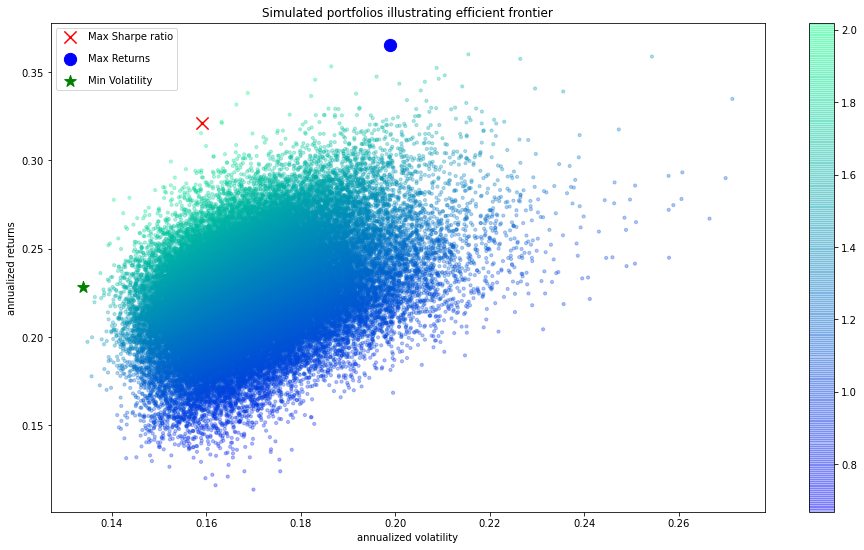

In [37]:
# plotting graph
plt.figure(figsize=(16, 9))
# x = volatility, y = annualized return, color mapping = sharpe ratio
plt.scatter(results[0,:],results[1,:],c=results[2,:], cmap='winter', marker='o', s=10, alpha=0.3)
plt.colorbar()


# Mark the portfolio w/ max Sharpe ratio
plt.scatter(sharpe_stdev_portfolio, sharpe_returns_portfolio, marker='x',color='r',s=150, label='Max Sharpe ratio')

# Mark the portfolio w/ max returns
plt.scatter(returns_stdev_portfolio, max_returns_portfolio,marker='o',color='b',s=150, label='Max Returns')

# Mark the portfolio w/ min volatility
plt.scatter(min_volatility_stdev_portfolio, min_volatility_portfolio, marker='*',color='g',s=150, label='Min Volatility')


plt.title('Simulated portfolios illustrating efficient frontier')
plt.xlabel('annualized volatility')
plt.ylabel('annualized returns')
plt.legend(labelspacing=1.2)